In [ ]:
import json
import time
import networkx as nx
from itertools import combinations
from datetime import datetime
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

#build permette di definire il punto di accesso da cui invocare i diversi endpoint delle YouTube API.
from googleapiclient.discovery import build

### Carico dict e grafo

In [ ]:
with open('muschio_dict.json', 'r') as json_file:
    muschio_dict = json.load(json_file)

muschio_net = nx.read_gexf('muschio_net.gexf')

### Creo ER e BA

In [ ]:
order = muschio_net.order() #nodi
size = muschio_net.size() #link

In [ ]:
# Parametri per Erdős-Rényi (ER) e Barabási-Albert (BA)
p_er = size / (order * (order - 1) / 2)  # Probabilità di collegamento per ER
m_ba = int(size / order)  # Numero medio di collegamenti per nodo per BA

In [ ]:
p_er

0.6286868686868687

In [ ]:
m_ba

31

In [ ]:
# Generazione del grafo ER
muschio_ERnet = nx.erdos_renyi_graph(order, p_er)

# Generazione del grafo BA
muschio_BAnet = nx.barabasi_albert_graph(order, m_ba)

### Distribuzione del grado e confronto con ER

La CCDF è l'opposto della CDF e rappresenta la probabilità che il grado di un nodo sia maggiore di un certo valore k


CDF

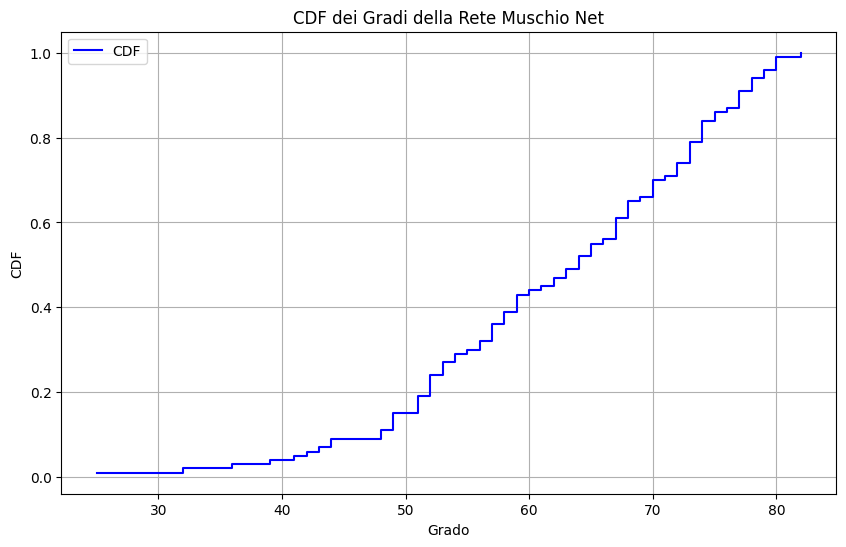

In [ ]:
# Calcola i gradi di tutti i nodi nel grafo
degrees = [degree for node, degree in muschio_net.degree()]

# Calcola la CDF
sorted_degrees = np.sort(degrees)
cdf = np.arange(1, len(sorted_degrees) + 1) / len(sorted_degrees)

# Crea il plot della CDF
plt.figure(figsize=(10, 6))
plt.step(sorted_degrees, cdf, where='post', label='CDF', color='b')
plt.title('CDF dei Gradi della Rete Muschio Net')
plt.xlabel('Grado')
plt.ylabel('CDF')
plt.grid(True)
plt.legend()
plt.show()


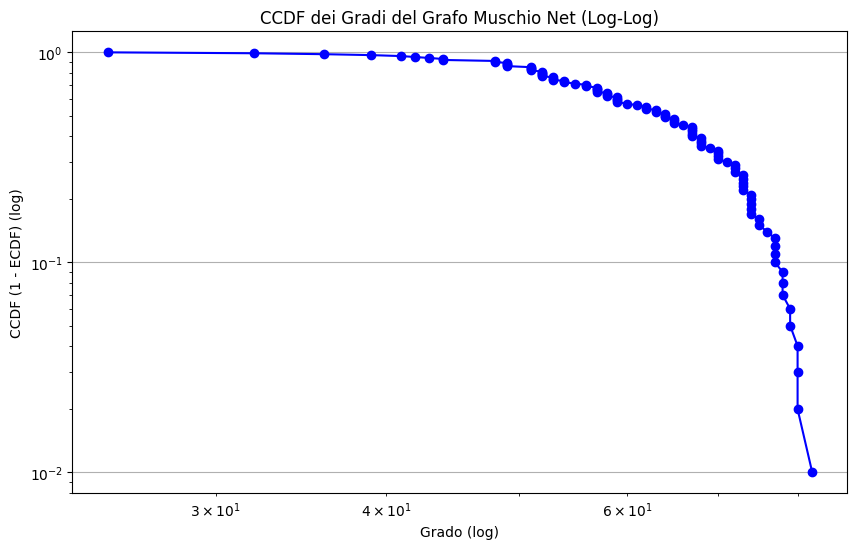

In [ ]:
# Calcola i gradi di tutti i nodi nel grafo
degrees = [degree for node, degree in muschio_net.degree()]

# Calcola ECDF
sorted_degrees = np.sort(degrees)
y_values = np.arange(len(sorted_degrees)) / float(len(sorted_degrees))

# Calcola CCDF
ccdf_values = 1 - y_values

# Evita il logaritmo di zero per i valori y
ccdf_values = np.maximum(ccdf_values, 1e-5)  # usa un piccolo valore per sostituire lo 0

# Crea il plot della CCDF in scala log-log
plt.figure(figsize=(10, 6))
plt.loglog(sorted_degrees, ccdf_values, marker='o', linestyle='-', color='b')
plt.title('CCDF dei Gradi del Grafo Muschio Net (Log-Log)')
plt.xlabel('Grado (log)')
plt.ylabel('CCDF (1 - ECDF) (log)')
plt.grid(True)
plt.show()

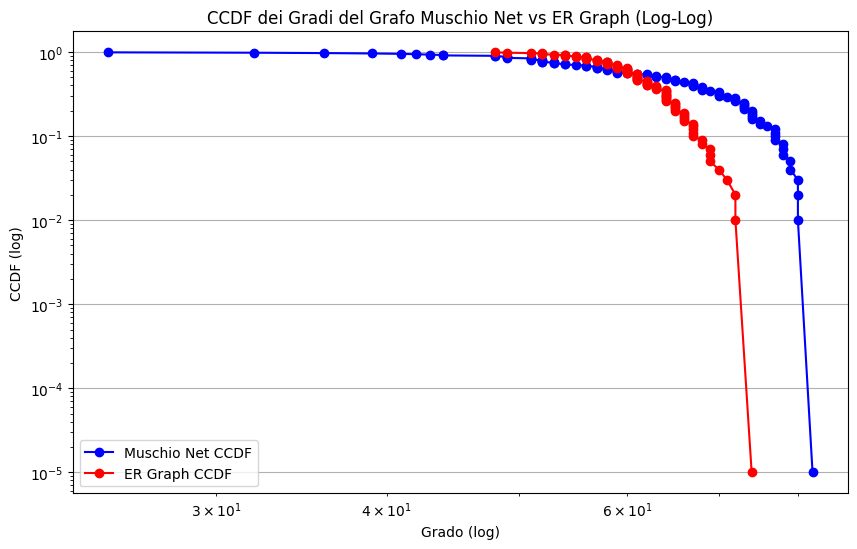

In [ ]:
# Calcola i gradi di tutti i nodi nel grafo Muschio Net
degrees_muschio = [degree for node, degree in muschio_net.degree()]

# Calcola ECDF per Muschio Net
sorted_degrees_muschio = np.sort(degrees_muschio)
y_values_muschio = np.arange(1, len(sorted_degrees_muschio)+1) / float(len(sorted_degrees_muschio))

# Calcola CCDF per Muschio Net
ccdf_values_muschio = 1 - y_values_muschio
ccdf_values_muschio = np.maximum(ccdf_values_muschio, 1e-5)  # Evita il logaritmo di zero

# Genera il grafo di Erdős–Rényi
p_er = muschio_net.size() / (muschio_net.order() * (muschio_net.order() - 1) / 2)
muschio_ERnet = nx.erdos_renyi_graph(muschio_net.order(), p_er)

# Calcola i gradi di tutti i nodi nel grafo ER
degrees_er = [degree for node, degree in muschio_ERnet.degree()]

# Calcola ECDF per ER
sorted_degrees_er = np.sort(degrees_er)
y_values_er = np.arange(1, len(sorted_degrees_er)+1) / float(len(sorted_degrees_er))

# Calcola CCDF per ER
ccdf_values_er = 1 - y_values_er
ccdf_values_er = np.maximum(ccdf_values_er, 1e-5)  # Evita il logaritmo di zero

# Crea il plot della CCDF in scala log-log
plt.figure(figsize=(10, 6))
plt.loglog(sorted_degrees_muschio, ccdf_values_muschio, marker='o', linestyle='-', color='b', label='Muschio Net CCDF')
plt.loglog(sorted_degrees_er, ccdf_values_er, marker='o', linestyle='-', color='r', label='ER Graph CCDF')
plt.title('CCDF dei Gradi del Grafo Muschio Net vs ER Graph (Log-Log)')
plt.xlabel('Grado (log)')
plt.ylabel('CCDF (log)')
plt.grid(True)
plt.legend()
plt.show()



Il grado corrisponde al numero di video con cui un certo video condivide dei commentatori

Asse delle Y: Indica la probabilità che il grado di un nodo sia maggiore di un dato valore. In pratica, mostra la frazione di nodi che hanno un grado superiore a quello specificato sull'asse delle X. Anche questo asse è in scala logaritmica, facilitando la visualizzazione di piccole probabilità.

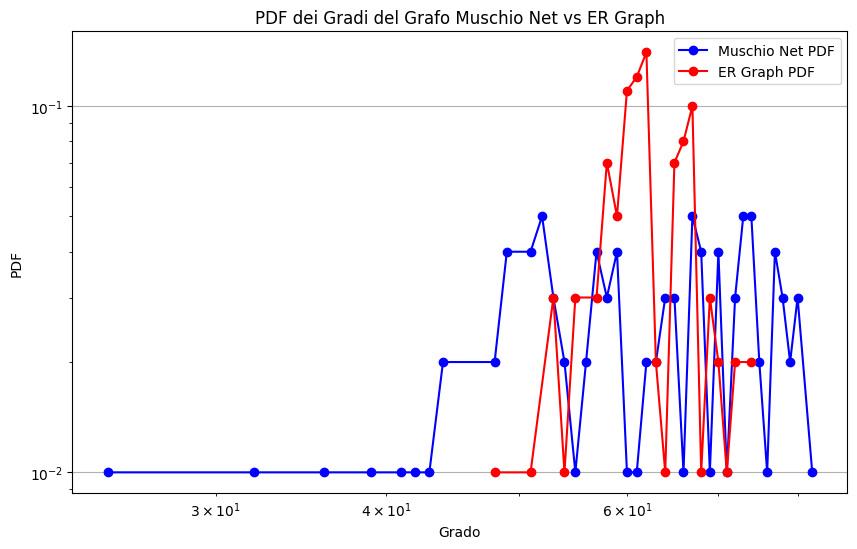

In [ ]:
# Calcola i gradi di tutti i nodi nel grafo Muschio Net
degrees_muschio = [degree for node, degree in muschio_net.degree()]

# Calcola PDF per Muschio Net
degree_count_muschio = Counter(degrees_muschio)
total_muschio = sum(degree_count_muschio.values())
pdf_values_muschio = {degree: count / total_muschio for degree, count in degree_count_muschio.items()}

# Genera il grafo di Erdős–Rényi
p_er = muschio_net.size() / (muschio_net.order() * (muschio_net.order() - 1) / 2)
muschio_ERnet = nx.erdos_renyi_graph(muschio_net.order(), p_er)

# Calcola i gradi di tutti i nodi nel grafo ER
degrees_er = [degree for node, degree in muschio_ERnet.degree()]

# Calcola PDF per ER
degree_count_er = Counter(degrees_er)
total_er = sum(degree_count_er.values())
pdf_values_er = {degree: count / total_er for degree, count in degree_count_er.items()}

# Preparazione per il plot
degrees_muschio_sorted = sorted(pdf_values_muschio.keys())
pdf_muschio_sorted = [pdf_values_muschio[degree] for degree in degrees_muschio_sorted]

degrees_er_sorted = sorted(pdf_values_er.keys())
pdf_er_sorted = [pdf_values_er[degree] for degree in degrees_er_sorted]

# Crea il plot della PDF
plt.figure(figsize=(10, 6))
plt.plot(degrees_muschio_sorted, pdf_muschio_sorted, marker='o', linestyle='-', color='b', label='Muschio Net PDF')
plt.plot(degrees_er_sorted, pdf_er_sorted, marker='o', linestyle='-', color='r', label='ER Graph PDF')
plt.title('PDF dei Gradi del Grafo Muschio Net vs ER Graph')
plt.xlabel('Grado')
plt.ylabel('PDF')
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.show()


PDF, confronto con ER e BA

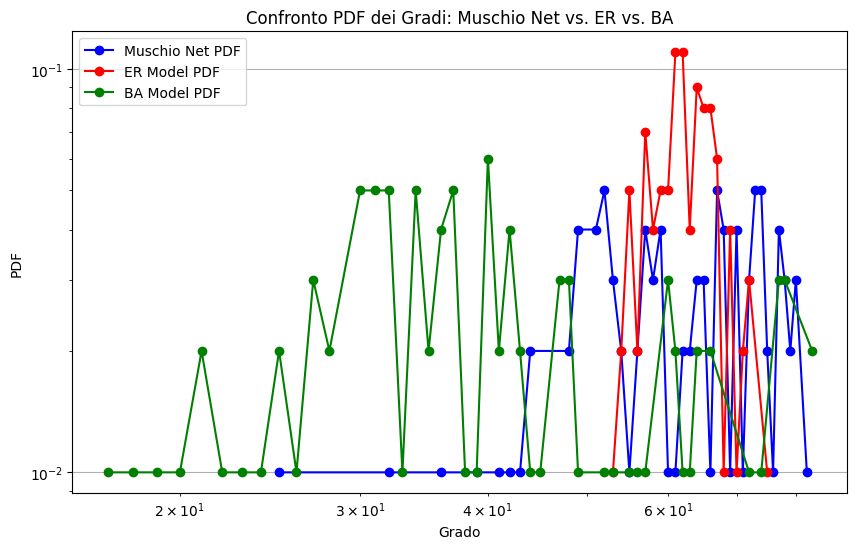

In [ ]:


# Calcola e visualizza la PDF per entrambe le reti
def plot_pdf(graph, label, color):
    degrees = [degree for node, degree in graph.degree()]
    degree_count = Counter(degrees)
    total = sum(degree_count.values())
    pdf_values = {degree: count / total for degree, count in degree_count.items()}
    degrees_sorted = sorted(pdf_values.keys())
    pdf_sorted = [pdf_values[degree] for degree in degrees_sorted]
    
    plt.plot(degrees_sorted, pdf_sorted, marker='o', linestyle='-', color=color, label=f'{label} PDF')

plt.figure(figsize=(10, 6))
plot_pdf(muschio_net, 'Muschio Net', 'blue')
plot_pdf(muschio_ERnet, 'ER Model', 'red')
plot_pdf(muschio_BAnet, 'BA Model', 'green')
plt.title('Confronto PDF dei Gradi: Muschio Net vs. ER vs. BA')
plt.xlabel('Grado')
plt.ylabel('PDF')
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.show()


### Misure di base

In [ ]:
# Calcolo dei gradi
degrees = [deg for node, deg in muschio_net.degree()]

# Grado medio
average_degree = sum(degrees) / len(muschio_net)

# Grado massimo
max_degree = max(degrees)

# Grado minimo
min_degree = min(degrees)

# Densità del grafo
density = nx.density(muschio_net)

print(f"Grado medio: {average_degree:.2f}")
print(f"Grado massimo: {max_degree}")
print(f"Grado minimo: {min_degree}")
print(f"Densità: {density:.4f}")



Grado medio: 62.24
Grado massimo: 82
Grado minimo: 25
Densità: 0.6287


In [ ]:
# Trova il nodo con il grado massimo
max_degree_node = max(muschio_net.degree, key=lambda x: x[1])[0]

# Estrai l'attributo 'title' (cambia 'title' con il nome esatto dell'attributo se diverso)
node_title = muschio_net.nodes[max_degree_node]['title']  # Assumendo che l'attributo sia 'title'

print(f"Titolo del nodo con il grado massimo ({max_degree_node}): {node_title}")

Titolo del nodo con il grado massimo (QvMwOqFqfCw): Ep.72 Babygang - Muschio Selvaggio Podcast


### Componenti connesse

In [ ]:
connected_components = list(nx.connected_components(muschio_net))

# Stampa il numero di componenti connesse e i nodi in ciascuna componente
print("Numero di componenti connesse:", len(connected_components))
for i, component in enumerate(connected_components):
    print(f"Componente {i+1}:", component)


Numero di componenti connesse: 1
Componente 1: {'m-MkspoXuCg', 'e5KOGTNPR0s', 'lZRh06m8c3E', 'ZoXfy-mRmDA', 'FhtDYbJ3Zq0', 'irs8KvNUHVA', 'cgpGKGBBM1M', 'Z8XyFBUbIKI', 'BaXO8zJ4-qk', 'HvxpjcnJ8DM', 'DNuQEW1PmGs', '1bmLPZGIO8g', 'rL0VdDs5M98', 'tem_iCzlHbI', 'DE73RUvK4CE', 'aZO-Fs5EexU', 'cLnflNvn44c', 'A-iYjcw08_4', 'QhG4-TCqlR0', '_TN0_qa8Z8Q', 'wW0huRRCA4c', 'Kw68ZX2Vv7c', 'lCd3oTMaqL4', 'lwN6KHSzz1A', '8JL5tuNRTfI', 'LR0Ef3NeSnE', 'I4bFKLlqQgA', '3L-lZ52Tvb4', '1qRm36lVcrk', 'wyPY3MYzy6Y', '1vAGpNbVyy0', 'b2agqFYLvZo', 'ZPgpwzI4Sic', 'rcWx3uamWAI', 'lNAvQMtn4GY', 'BtBOXdzsLz8', '2kwNmC5hsZs', 'p3j7a_UtjHQ', 'uOzluA2iFx4', 'o3XZkypt-eY', 'z7etMqM-uUc', 'tyd4nPpVty4', 'W3UcDcqpJ4g', 'hLlztGJ1j20', 'arVmczOyLpU', 'mYXajz3svBI', 'm85LnIszkLU', 'Es_Tph_Vct0', 'wdQS5Y9yAQk', '7959aDt7v14', 'ntUIa1l2igA', 'tKAwASYkPoY', 'cOIZqTMiqMs', 'NOgDuCXGoV4', '8GxClTI1HzY', 'Q2T1fcigGW0', 'p7nV7AtIJNU', 'u2wkb1evW7k', '-cHX_DT7anI', 'ai2PNhtJozQ', 'aDRYq7zKxiI', 'kfBjPqwknXI', 'xjWmp_oM29Y', 'Hq0XKQ

## Ho una rete small world?

In [ ]:
# Verifica se la rete è connessa
if nx.is_connected(muschio_net):
    # Calcola la lunghezza media del cammino
    muschio_net_avg_path_length = nx.average_shortest_path_length(muschio_net)
    # Calcola il coefficiente di clustering medio
    muschio_net_avg_clustering = nx.average_clustering(muschio_net)
else:
    print("muschio_net non è connessa. Utilizza solo la componente connessa più grande.")

# Stampa i risultati per muschio_net
print(f"Lunghezza media del cammino (muschio_net): {muschio_net_avg_path_length}")
print(f"Coefficiente di clustering medio (muschio_net): {muschio_net_avg_clustering}")

# Genera una rete casuale Erdős-Rényi con lo stesso numero di nodi e probabilità di collegamento
p = muschio_net.number_of_edges() / (muschio_net.number_of_nodes() * (muschio_net.number_of_nodes() - 1) / 2)
muschio_ERnet = nx.erdos_renyi_graph(n=muschio_net.number_of_nodes(), p=p)

# Calcola le metriche per muschio_ERnet
if nx.is_connected(muschio_ERnet):
    muschio_ERnet_avg_path_length = nx.average_shortest_path_length(muschio_ERnet)
    muschio_ERnet_avg_clustering = nx.average_clustering(muschio_ERnet)
else:
    print("muschio_ERnet non è connessa. Considera una componente connessa più grande.")

# Stampa i risultati per muschio_ERnet
print(f"Lunghezza media del cammino (muschio_ERnet): {muschio_ERnet_avg_path_length}")
print(f"Coefficiente di clustering medio (muschio_ERnet): {muschio_ERnet_avg_clustering}")


Lunghezza media del cammino (muschio_net): 1.3713131313131313
Coefficiente di clustering medio (muschio_net): 0.6838145716621539
Lunghezza media del cammino (muschio_ERnet): 1.3652525252525252
Coefficiente di clustering medio (muschio_ERnet): 0.6366728885469481


### Centrality

In [ ]:
# Calcola le centralità per l'intero grafo
degree_centrality = nx.degree_centrality(muschio_net)
betweenness_centrality = nx.betweenness_centrality(muschio_net)
closeness_centrality = nx.closeness_centrality(muschio_net)
eigenvector_centrality = nx.eigenvector_centrality(muschio_net)

# Ordina i nodi per ogni tipo di centralità e prendi i primi 5
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:3]

# Funzione per stampare i risultati
def print_top_videos(top_list, centrality_type):
    print(f"Top 3 nodi per {centrality_type}:")
    for node, centrality in top_list:
        title = muschio_net.nodes[node]['title']  # Assumendo che il titolo sia memorizzato nell'attributo 'title'
        print(f"{title} - {centrality_type} Centrality: {centrality:.4f}")

# Stampa i risultati per ogni tipo di centralità
print_top_videos(top_degree, "Degree")
print_top_videos(top_betweenness, "Betweenness")
print_top_videos(top_closeness, "Closeness")
print_top_videos(top_eigenvector, "Eigenvector")


Top 3 nodi per Degree:
Ep.72 Babygang - Muschio Selvaggio Podcast - Degree Centrality: 0.8283
Ep.120 Il segreto di una lunga carriera con Emma Marrone - Muschio Selvaggio Podcast - Degree Centrality: 0.8081
Ep.83 Dargen D’Amico è un nostro amico - Muschio Selvaggio Podcast - Degree Centrality: 0.8081
Top 3 nodi per Betweenness:
Ep.128 Che muschio che fa con Fabio Fazio - Muschio Selvaggio Podcast - Betweenness Centrality: 0.0073
Ep.64 Amore e Milano con Boldi e MYSS KETA - Muschio Selvaggio Podcast - Betweenness Centrality: 0.0068
Ep.72 Babygang - Muschio Selvaggio Podcast - Betweenness Centrality: 0.0066
Top 3 nodi per Closeness:
Ep.72 Babygang - Muschio Selvaggio Podcast - Closeness Centrality: 0.8534
Ep.120 Il segreto di una lunga carriera con Emma Marrone - Muschio Selvaggio Podcast - Closeness Centrality: 0.8390
Ep.83 Dargen D’Amico è un nostro amico - Muschio Selvaggio Podcast - Closeness Centrality: 0.8390
Top 3 nodi per Eigenvector:
Ep.72 Babygang - Muschio Selvaggio Podcast - 

### Coefficiente di clustering

In [ ]:
# Calcola il coefficiente di clustering globale (trasmissività)
global_clustering = nx.transitivity(muschio_net)

print(f"Coeficiente di clustering globale (trasmissività) della rete: {global_clustering:.4f}")

Coeficiente di clustering globale (trasmissività) della rete: 0.6861


In [ ]:
# Calcola il coefficiente di clustering locale per ogni nodo
local_clustering = nx.clustering(muschio_net)

# Calcola il coefficiente di clustering medio per la rete
average_clustering = nx.average_clustering(muschio_net)

# Ordina i nodi per coefficiente di clustering locale e prendi i primi 5
top_5_clustering = sorted(local_clustering.items(), key=lambda x: x[1], reverse=True)[10:]

print(f"Coeficiente di clustering medio della rete: {average_clustering:.4f}")
print("Top 5 nodi per coefficiente di clustering locale:")
for node, clustering in top_5_clustering:
    title = muschio_net.nodes[node]['title']  # Assumendo che il titolo sia memorizzato nell'attributo 'title'
    print(f"{title} - Coefficiente di clustering locale: {clustering:.4f}")


Coeficiente di clustering medio della rete: 0.6838
Top 5 nodi per coefficiente di clustering locale:
Ep.106 Parliamo di mafia col magistrato Gratteri - Muschio Selvaggio Podcast - Coefficiente di clustering locale: 0.7226
Ep.87 Lazza e scorrettezza - Muschio Selvaggio Podcast - Coefficiente di clustering locale: 0.7202
Ep.98 Un ospite di spessore, Nello Taver - Muschio Selvaggio Podcast - Coefficiente di clustering locale: 0.7202
Ep.84 magia con Franchino - Muschio Selvaggio Podcast - Coefficiente di clustering locale: 0.7195
Ep.107 The Chainsmokers son dei regaz - Muschio Selvaggio Podcast - Coefficiente di clustering locale: 0.7188
Ep.100 Un mucchio selvaggio - Muschio Selvaggio Podcast - Coefficiente di clustering locale: 0.7186
Ep.70 Amici di Sangiovanni - Muschio Selvaggio Podcast - Coefficiente di clustering locale: 0.7180
Ep.102 Prendiamoci il futuro con Galimberti - Muschio Selvaggio Podcast - Coefficiente di clustering locale: 0.7169
Ep.61 Cachemire vs Muschio Selvaggio - Podc

I nodi con il più alto coefficiente di clustering locale tendono ad essere quegli episodi che non solo sono popolari o centrali in termini di connessioni (come visto nelle precedenti analisi di centralità), ma che funzionano anche come nuclei di comunità più strette all'interno della rete. Questo potrebbe indicare che questi episodi coinvolgono temi o personaggi particolarmente capaci di catalizzare l'interesse o la partecipazione attiva degli ascoltatori.
Questi episodi possono essere visti come punti di aggregazione comunitaria all'interno della rete, dove si formano e si rafforzano sub-comunità. Potrebbero essere utili per sfruttare l'influenza o la promozione mirata, dato che attraggono gruppi di ascoltatori che sono fortemente interconnessi.

In [ ]:
# Calcola il coefficiente di clustering locale per ogni nodo
local_clustering = nx.clustering(muschio_net)

# Trova il nodo con il coefficiente di clustering locale più basso
min_clustering_node = min(local_clustering, key=local_clustering.get)
min_clustering_value = local_clustering[min_clustering_node]

# Estrai il titolo del nodo
min_node_title = muschio_net.nodes[min_clustering_node]['title']

print(f"Nodo con il coefficiente di clustering locale più basso: {min_node_title}")
print(f"Coeficiente di clustering locale: {min_clustering_value:.4f}")


Nodo con il coefficiente di clustering locale più basso: Ep.146 Zodiac e Il Mostro di Firenze con Valeria Vecchione e Daniele Trinchieri - Muschio Selvaggio
Coeficiente di clustering locale: 0.6173


### Coppie di nodi con più connessioni, hanno argomenti in comune?

In [ ]:
# Calcola tutte le possibili coppie di nodi nel grafo
node_pairs = combinations(muschio_net.nodes(), 2)

# Dizionario per memorizzare le coppie di nodi e il numero di connessioni comuni
common_connections = {}

# Calcola le connessioni comuni per ogni coppia
for u, v in node_pairs:
    # Intersezione dei vicini di u e v
    common_neighbors = len(list(nx.common_neighbors(muschio_net, u, v)))
    if common_neighbors > 0:  # Considera solo le coppie con connessioni comuni
        common_connections[(u, v)] = common_neighbors

# Ordina le coppie di nodi per il numero di connessioni comuni, decrescente
sorted_common_connections = sorted(common_connections.items(), key=lambda x: x[1], reverse=True)

# Prendi le prime 5 coppie
top_5_common_connections = sorted_common_connections[:5]

print("Top 5 coppie di nodi per connessioni comuni:")
for (node1, node2), num_connections in top_5_common_connections:
    title1 = muschio_net.nodes[node1]['title']
    title2 = muschio_net.nodes[node2]['title']
    print(f"{title1} - {title2}: {num_connections} connessioni comuni")


Top 5 coppie di nodi per connessioni comuni:
Ep.83 Dargen D’Amico è un nostro amico - Muschio Selvaggio Podcast - Ep.64 Amore e Milano con Boldi e MYSS KETA - Muschio Selvaggio Podcast: 70 connessioni comuni
Ep.121 Il sistema doping con Alex Schwazer e Sandro Donati - Muschio Selvaggio Podcast - Ep.120 Il segreto di una lunga carriera con Emma Marrone - Muschio Selvaggio Podcast: 69 connessioni comuni
Ep.120 Il segreto di una lunga carriera con Emma Marrone - Muschio Selvaggio Podcast - Ep.72 Babygang - Muschio Selvaggio Podcast: 69 connessioni comuni
Ep.88 salviamo il mondo con Fartade e Barbascura - Muschio Selvaggio Podcast - Ep.72 Babygang - Muschio Selvaggio Podcast: 69 connessioni comuni
Ep.79 Carlo Cracco alla fine è simpatico dai - Muschio Selvaggio Podcast - Ep.64 Amore e Milano con Boldi e MYSS KETA - Muschio Selvaggio Podcast: 69 connessioni comuni


controllo per la prima coppia di nodi quanti link hanno per capire se 70 in comune sono tanti.

In [ ]:
def find_node_by_title(graph, title_part):
    """ Trova il primo nodo nel grafo che contiene il titolo fornito nel suo attributo 'title'. """
    for node, data in graph.nodes(data=True):
        if title_part.lower() in data.get('title', '').lower():
            return node
    return None

# Titoli parziali degli episodi
title_part1 = "Ep.83 Dargen D’Amico è un nostro amico"
title_part2 = "Ep.64 Amore e Milano con Boldi e MYSS KETA"

# Trova i nodi corrispondenti
node1 = find_node_by_title(muschio_net, title_part1)
node2 = find_node_by_title(muschio_net, title_part2)

# Verifica che i nodi siano stati trovati
if node1 and node2:
    # Calcola il grado di ciascun nodo
    grado_node1 = muschio_net.degree(node1)
    grado_node2 = muschio_net.degree(node2)

    # Stampa i risultati
    print(f"Il grado del nodo '{node1}' ({title_part1}) è {grado_node1}.")
    print(f"Il grado del nodo '{node2}' ({title_part2}) è {grado_node2}.")

    # Calcola e stampa la proporzione delle connessioni comuni
    if (node1, node2) in muschio_net.edges or (node2, node1) in muschio_net.edges:
        common_neighbors_count = muschio_net[node1][node2]['weight']  # Assumi che il peso sia memorizzato come 'weight'
        proporzione1 = common_neighbors_count / grado_node1
        proporzione2 = common_neighbors_count / grado_node2
        print(f"Proporzione di connessioni comuni per '{title_part1}': {proporzione1:.2f}")
        print(f"Proporzione di connessioni comuni per '{title_part2}': {proporzione2:.2f}")
else:
    print("Uno o entrambi i nodi non trovati.")



Il grado del nodo 'tKAwASYkPoY' (Ep.83 Dargen D’Amico è un nostro amico) è 80.
Il grado del nodo 'G27DdT7qs2g' (Ep.64 Amore e Milano con Boldi e MYSS KETA) è 80.
Proporzione di connessioni comuni per 'Ep.83 Dargen D’Amico è un nostro amico': 0.05
Proporzione di connessioni comuni per 'Ep.64 Amore e Milano con Boldi e MYSS KETA': 0.05


è sbagliato, spiegare cos'è questo sopra dopo....

ora lo faccio giusto

In [ ]:
# Dizionario per memorizzare le coppie di nodi e il numero di commentatori comuni (peso del collegamento)
edges_with_weights = {}

# Itera attraverso tutti gli edge nel grafo
for u, v, data in muschio_net.edges(data=True):
    # Assumi che 'weight' sia la chiave dove è memorizzato il numero di commentatori comuni
    edges_with_weights[(u, v)] = data['weight']

# Ordina le coppie di nodi per il numero di commentatori comuni (peso), in ordine decrescente
sorted_edges_by_weight = sorted(edges_with_weights.items(), key=lambda x: x[1], reverse=True)

# Prendi le prime 3 coppie
top_3_edges = sorted_edges_by_weight[:3]

print("Top 3 coppie di nodi per commentatori comuni:")
for (node1, node2), weight in top_3_edges:
    title1 = muschio_net.nodes[node1]['title']
    title2 = muschio_net.nodes[node2]['title']
    print(f"{title1} - {title2}: {weight} commentatori comuni")



Top 3 coppie di nodi per commentatori comuni:
Ep.83 Dargen D’Amico è un nostro amico - Muschio Selvaggio Podcast - Ep.82 i Tananai saranno i primi - Muschio Selvaggio Podcast: 11.0 commentatori comuni
Ep.123 Tra Fede e scienza con Sammy Basso - Muschio Selvaggio Podcast - Ep.113 Aiutiamoli a casa loro con Cecilia Strada - Muschio Selvaggio Podcast: 10.0 commentatori comuni
Ep.119 Nuovo cantautorato con Bresh - Muschio Selvaggio Podcast - Ep.116 Bollenti con Villa Banks - Muschio Selvaggio Podcast: 10.0 commentatori comuni


### Community detection

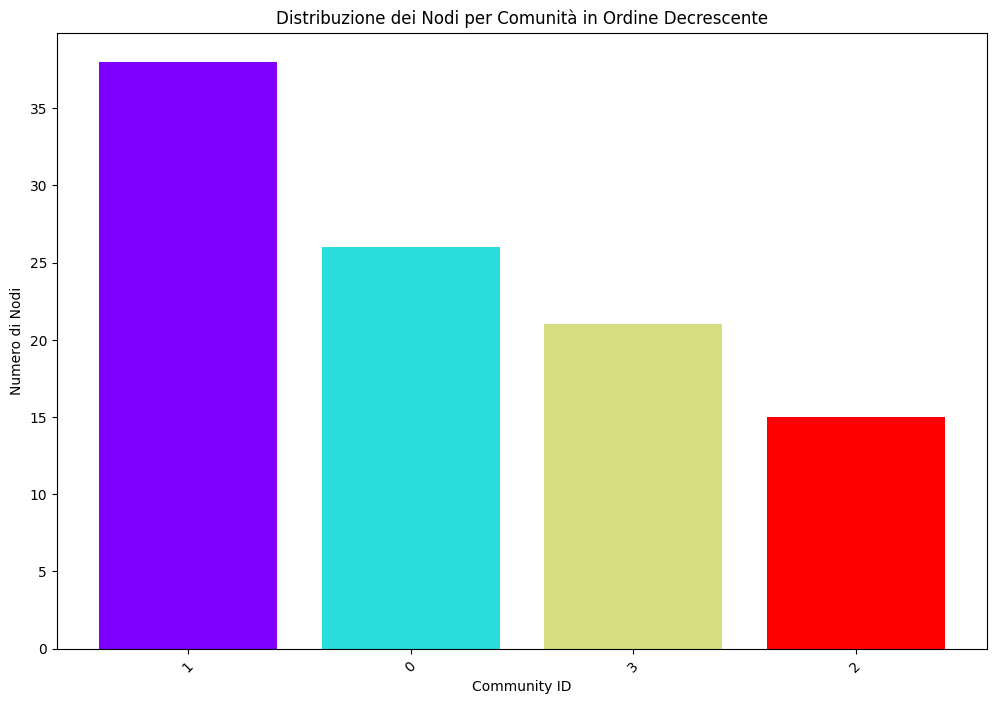

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter

# Assumendo che 'muschio_net' sia il tuo grafo e ogni nodo abbia un attributo 'community'
communities = nx.get_node_attributes(muschio_net, 'community')

# Calcola il numero di nodi per ogni comunità
community_counts = Counter(communities.values())

# Ordina le comunità per numero di nodi in ordine decrescente
sorted_communities = sorted(community_counts.items(), key=lambda x: x[1], reverse=True)
labels, values = zip(*sorted_communities)  # Unzipping the sorted items

# Prepara l'asse X con le etichette ordinati correttamente
x_labels = [str(label) for label in labels]

# Crea un grafico a barre
plt.figure(figsize=(12, 8))
bars = plt.bar(x_labels, values, color=plt.cm.rainbow(np.linspace(0, 1, len(labels))))

# Aggiungi titoli e etichette
plt.title('Distribuzione dei Nodi per Comunità in Ordine Decrescente')
plt.xlabel('Community ID')
plt.ylabel('Numero di Nodi')
plt.xticks(rotation=45)  # Ruota le etichette sull'asse x per una migliore lettura

# Mostra il grafico
plt.show()



### Comunità sovrapposte

In [ ]:
# Scegli un valore di k
k = 3  # Ad esempio, per 3-clique

# Trova le comunità di k-clique
communities = list(nx.algorithms.community.k_clique_communities(muschio_net, k))

# Stampa le comunità trovate
for community in communities:
    print(list(community))


KernelInterrupted: Execution interrupted by the Jupyter kernel.

In [ ]:
k = 3
# Trova le comunità di k-clique
communities = nx.algorithms.community.k_clique_communities(muschio_net, k)

# Stampa le comunità trovate
for community in communities:
    print(list(community))  # Converti in lista solo quando necessario per la stampa


KernelInterrupted: Execution interrupted by the Jupyter kernel.

salvo

In [ ]:
communities_as_lists = [list(community) for community in communities]

with open('communities.json', 'w') as f:
    json.dump(communities_as_lists, f)

carico

In [ ]:
with open('communities.json', 'r') as f:
    communities_as_lists = json.load(f)

# Converte le liste in set per l'uso in NetworkX, se necessario
communities = [set(community) for community in communities_as_lists]


aggiungo comunità come attributi e salvo grafo

In [ ]:
# Crea una copia del grafo
muschio_net2 = muschio_net.copy()

# Assegna gli attributi di comunità ai nodi nel grafo copiato
for idx, community in enumerate(communities):
    for node in community:
        if node in muschio_net2:  # Assicurati che il nodo esista nel grafo
            muschio_net2.nodes[node]['community'] = idx

# Salva il grafo copiato in formato GEXF per l'uso in Gephi
nx.write_gexf(muschio_net2, 'updated_network2.gexf')

### Le fasi per l'analisi temporale:

In [ ]:
# Ottenere tutti i nodi con i loro attributi
nodes_data = muschio_net.nodes(data=True)

# Trovare il nodo con il timestamp più antico (primo video)
first_video = min(nodes_data, key=lambda x: x[1]['published_at'])  # Sostituisci 'timestamp' con l'attributo corretto
first_title = first_video[1]['title']  # Sostituisci 'title' con il nome del campo corretto

# Trovare il nodo con il timestamp più recente (ultimo video)
last_video = max(nodes_data, key=lambda x: x[1]['published_at'])  # Sostituisci 'timestamp' con l'attributo corretto
last_title = last_video[1]['title']  # Sostituisci 'title' con il nome del campo corretto

print("Primo titolo video:", first_title)
print("Ultimo titolo video:", last_title)


Primo titolo video: Ep.57 Fixing Italy con Alessandro Masala - Muschio Selvaggio Podcast
Ultimo titolo video: Ep.155 Podcast di Stato con Daniele Tinti e Stefano Rapone - Muschio Selvaggio Podcast


Fedez & Luis + Martin = 57 - 112

Fedez = 113 - 120

Fedez + Marra = 121 - 147 (Ci sono i due video famosi qua in mezzo, verso l'inizio, eliminarli?)

Luis + Martin = 148 - 155

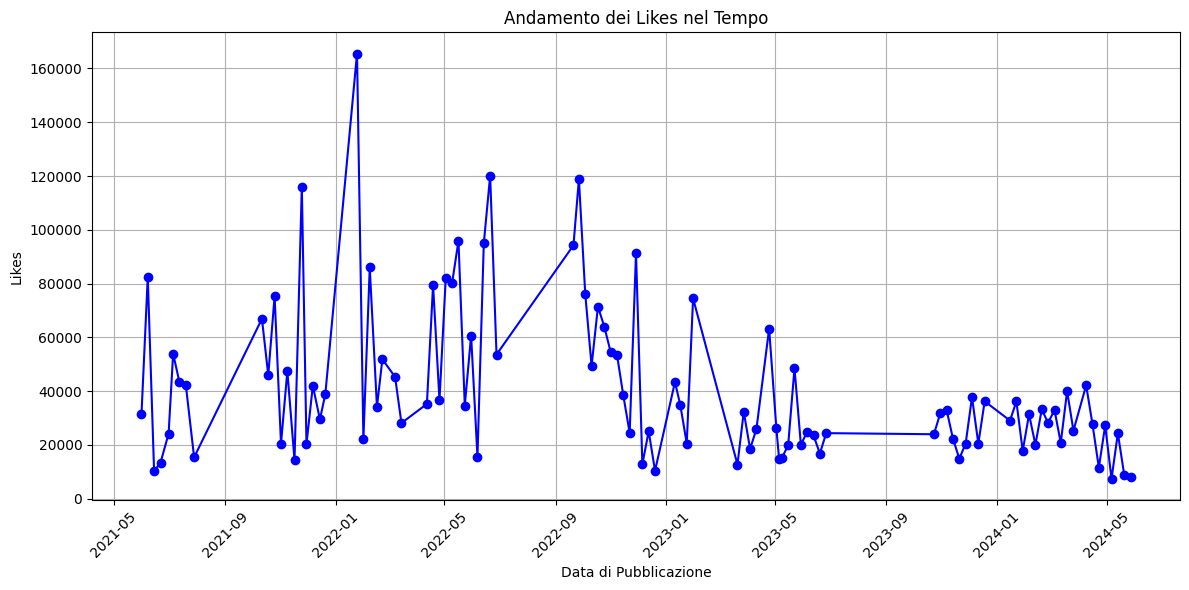

In [ ]:
dates = []
likes = []

for node, data in muschio_net.nodes(data=True):
    if 'published_at' in data and 'likes' in data:
        # Converti la data nel formato datetime
        date = datetime.strptime(data['published_at'], '%Y-%m-%d %H:%M:%S')
        dates.append(date)
        likes.append(data['likes'])

# Ordina i dati per data
sorted_dates_likes = sorted(zip(dates, likes))
sorted_dates, sorted_likes = zip(*sorted_dates_likes)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(sorted_dates, sorted_likes, marker='o', linestyle='-', color='b')
plt.title('Andamento dei Likes nel Tempo')
plt.xlabel('Data di Pubblicazione')
plt.ylabel('Likes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


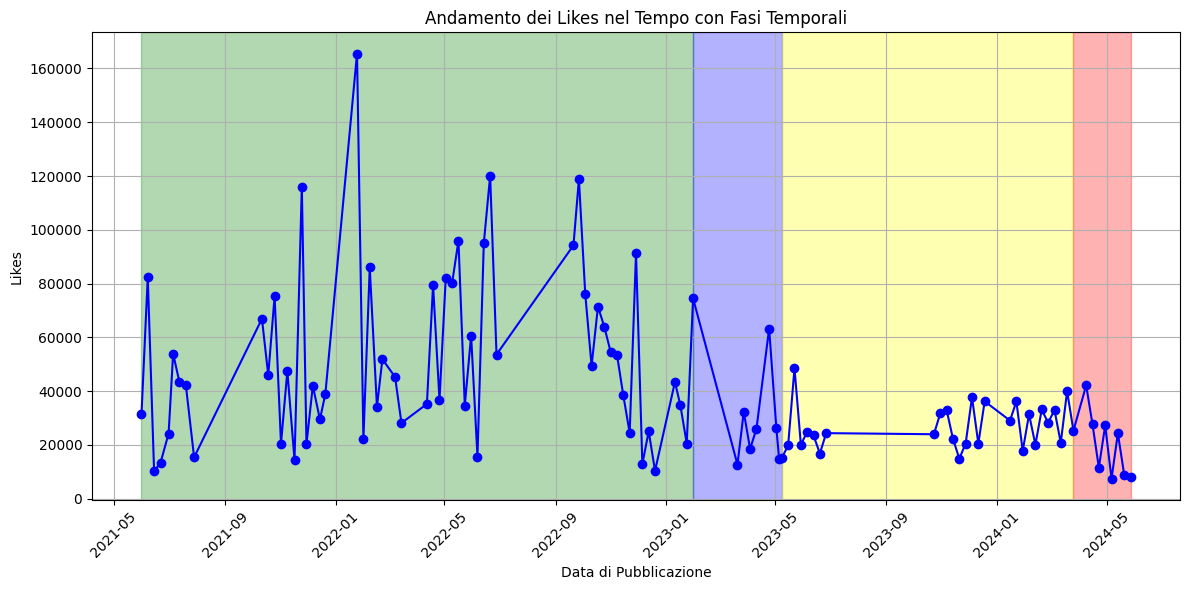

In [ ]:
import re
# Variabili per le date di inizio e fine di ogni fase
phase1_start = phase1_end = None
phase2_start = phase2_end = None
phase3_start = phase3_end = None
phase4_start = phase4_end = None

# Estrazione delle date basate sui titoli degli episodi
for node, data in muschio_net.nodes(data=True):
    if 'published_at' in data and 'title' in data:
        # Cerca di inferire il numero dell'episodio dal titolo
        match = re.search(r'\bEp\.(\d+)', data['title'])
        if match:
            episode_number = int(match.group(1))
            date = datetime.strptime(data['published_at'], '%Y-%m-%d %H:%M:%S')
            if episode_number == 57:
                phase1_start = date
            elif episode_number == 112:
                phase1_end = phase2_start = date
            elif episode_number == 120:
                phase2_end = phase3_start = date
            elif episode_number == 147:
                phase3_end = phase4_start = date
            elif episode_number == 155:
                phase4_end = date

# Assicurati che tutte le date necessarie siano state trovate
if None not in [phase1_start, phase1_end, phase2_start, phase2_end, phase3_start, phase3_end, phase4_start, phase4_end]:
    # Estrai i dati di pubblicazione e i likes
    dates = []
    likes = []
    for node, data in muschio_net.nodes(data=True):
        if 'published_at' in data and 'likes' in data:
            date = datetime.strptime(data['published_at'], '%Y-%m-%d %H:%M:%S')
            dates.append(date)
            likes.append(data['likes'])

    # Ordina i dati per data
    sorted_dates_likes = sorted(zip(dates, likes))
    sorted_dates, sorted_likes = zip(*sorted_dates_likes)

    # Plotting
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(sorted_dates, sorted_likes, marker='o', linestyle='-', color='b')
    # Colora le diverse fasi
    ax.axvspan(phase1_start, phase1_end, color='green', alpha=0.3)
    ax.axvspan(phase2_start, phase2_end, color='blue', alpha=0.3)
    ax.axvspan(phase3_start, phase3_end, color='yellow', alpha=0.3)
    ax.axvspan(phase4_start, phase4_end, color='red', alpha=0.3)
    ax.set_title('Andamento dei Likes nel Tempo con Fasi Temporali')
    ax.set_xlabel('Data di Pubblicazione')
    ax.set_ylabel('Likes')
    ax.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Non tutte le date di confine sono state trovate. Controlla i dati degli episodi.")


### L'outlier di likes è la puntata: 

### Ep.77 Gli Avengers del calcio con Bonucci e Chiellini - Muschio Selvaggio Podcast

spiegare la gag

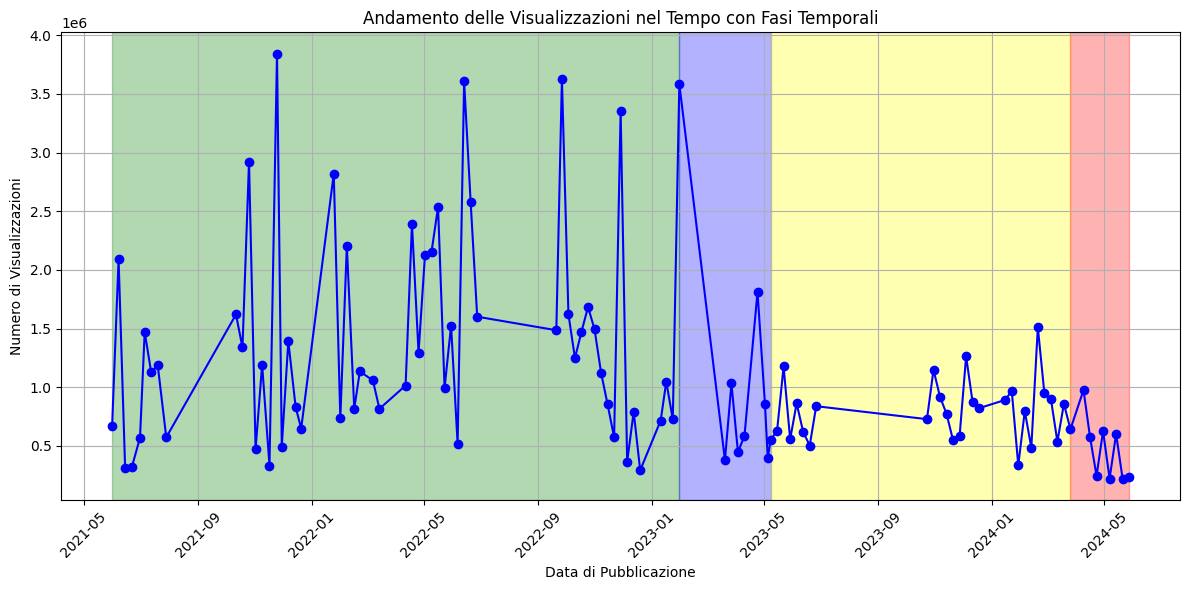

In [ ]:
import re

# Variabili per le date di inizio e fine di ogni fase, già determinate precedentemente
phase1_start = phase1_end = None
phase2_start = phase2_end = None
phase3_start = phase3_end = None
phase4_start = phase4_end = None

# Estrazione delle date basate sui titoli degli episodi
for node, data in muschio_net.nodes(data=True):
    if 'published_at' in data and 'title' in data:
        # Cerca di inferire il numero dell'episodio dal titolo
        match = re.search(r'\bEp\.(\d+)', data['title'])
        if match:
            episode_number = int(match.group(1))
            date = datetime.strptime(data['published_at'], '%Y-%m-%d %H:%M:%S')
            if episode_number == 57:
                phase1_start = date
            elif episode_number == 112:
                phase1_end = phase2_start = date
            elif episode_number == 120:
                phase2_end = phase3_start = date
            elif episode_number == 147:
                phase3_end = phase4_start = date
            elif episode_number == 155:
                phase4_end = date

# Controllo delle date trovate e estrazione delle visualizzazioni
if None not in [phase1_start, phase1_end, phase2_start, phase2_end, phase3_start, phase3_end, phase4_start, phase4_end]:
    dates = []
    views = []
    for node, data in muschio_net.nodes(data=True):
        if 'published_at' in data and 'views' in data:
            date = datetime.strptime(data['published_at'], '%Y-%m-%d %H:%M:%S')
            dates.append(date)
            views.append(data['views'])

    # Ordina i dati per data
    sorted_dates_views = sorted(zip(dates, views))
    sorted_dates, sorted_views = zip(*sorted_dates_views)

    # Plotting
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(sorted_dates, sorted_views, marker='o', linestyle='-', color='b')
    # Colora le diverse fasi
    ax.axvspan(phase1_start, phase1_end, color='green', alpha=0.3)
    ax.axvspan(phase2_start, phase2_end, color='blue', alpha=0.3)
    ax.axvspan(phase3_start, phase3_end, color='yellow', alpha=0.3)
    ax.axvspan(phase4_start, phase4_end, color='red', alpha=0.3)
    ax.set_title('Andamento delle Visualizzazioni nel Tempo con Fasi Temporali')
    ax.set_xlabel('Data di Pubblicazione')
    ax.set_ylabel('Numero di Visualizzazioni')
    ax.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Non tutte le date di confine sono state trovate. Controlla i dati degli episodi.")


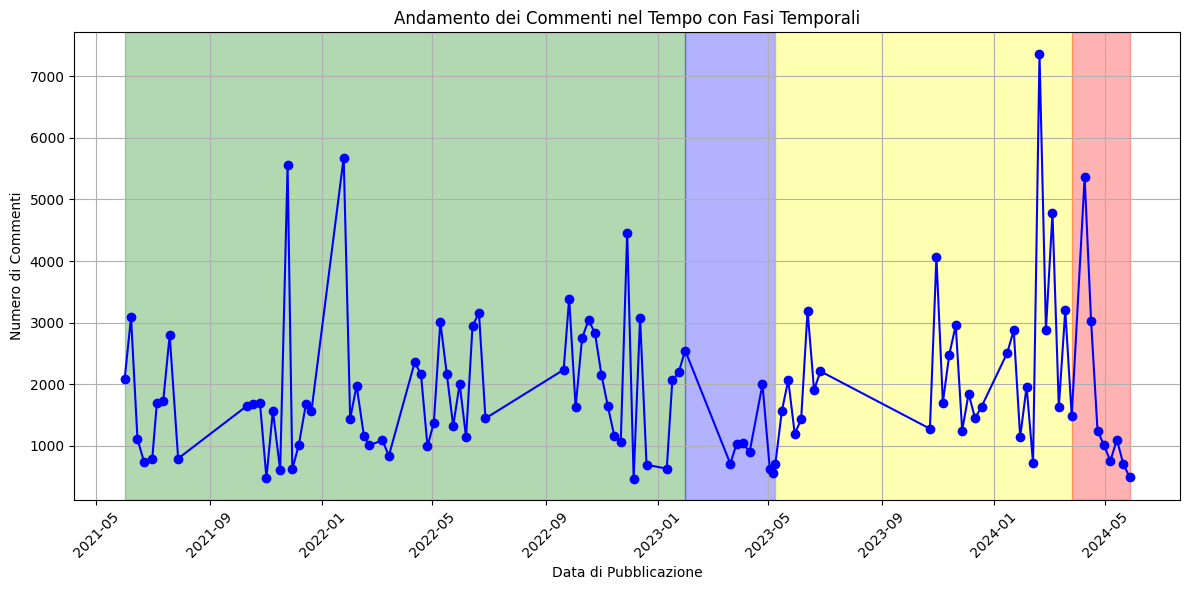

In [ ]:
phase1_start = phase1_end = None
phase2_start = phase2_end = None
phase3_start = phase3_end = None
phase4_start = phase4_end = None

# Estrazione delle date dei confini delle fasi basate sui titoli degli episodi
for node, data in muschio_net.nodes(data=True):
    if 'published_at' in data and 'title' in data:
        # Cerca di inferire il numero dell'episodio dal titolo
        match = re.search(r'\bEp\.(\d+)', data['title'])
        if match:
            episode_number = int(match.group(1))
            date = datetime.strptime(data['published_at'], '%Y-%m-%d %H:%M:%S')
            if episode_number == 57:
                phase1_start = date
            elif episode_number == 112:
                phase1_end = phase2_start = date
            elif episode_number == 120:
                phase2_end = phase3_start = date
            elif episode_number == 147:
                phase3_end = phase4_start = date
            elif episode_number == 155:
                phase4_end = date

# Verifica delle date trovate e estrazione dei dati di commenti
if None not in [phase1_start, phase1_end, phase2_start, phase2_end, phase3_start, phase3_end, phase4_start, phase4_end]:
    dates = []
    comments = []
    for node, data in muschio_net.nodes(data=True):
        if 'published_at' in data and 'comment_count' in data:
            date = datetime.strptime(data['published_at'], '%Y-%m-%d %H:%M:%S')
            dates.append(date)
            comments.append(int(data['comment_count']))

    # Ordina i dati per data
    sorted_dates_comments = sorted(zip(dates, comments))
    sorted_dates, sorted_comments = zip(*sorted_dates_comments)

    # Plotting
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(sorted_dates, sorted_comments, marker='o', linestyle='-', color='b')
    # Colora le diverse fasi
    ax.axvspan(phase1_start, phase1_end, color='green', alpha=0.3)
    ax.axvspan(phase2_start, phase2_end, color='blue', alpha=0.3)
    ax.axvspan(phase3_start, phase3_end, color='yellow', alpha=0.3)
    ax.axvspan(phase4_start, phase4_end, color='red', alpha=0.3)
    ax.set_title('Andamento dei Commenti nel Tempo con Fasi Temporali')
    ax.set_xlabel('Data di Pubblicazione')
    ax.set_ylabel('Numero di Commenti')
    ax.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Non tutte le date di confine sono state trovate. Controlla i dati degli episodi.")
